# Data Analysis
Get insights from the data, and generate visualizations to help understand the data better.

## Import dependencies

In [9]:
from preliminary_analysis_tweet import run_tweet_analysis
from preliminary_analysis_text import run_text_analysis
from preliminary_analysis_code import run_code_analysis

## Run Analysis on Tweets
Args:
- file: path to the csv file (String)
- save: whether to save the generated plots (Boolean)

Number of tweets: 904358
Time range: 2007-01-08 09:49:15 to 2022-12-31 23:55:04
Number of users: 6
Mean number of tweets per user: 150726.33333333334
Median number of tweets per user: 177313.5
Min number of tweets per user: 2610
Max number of tweets per user: 223348
Number of users with more than 10 tweets: 6
Number of users with more than 100 tweets: 6


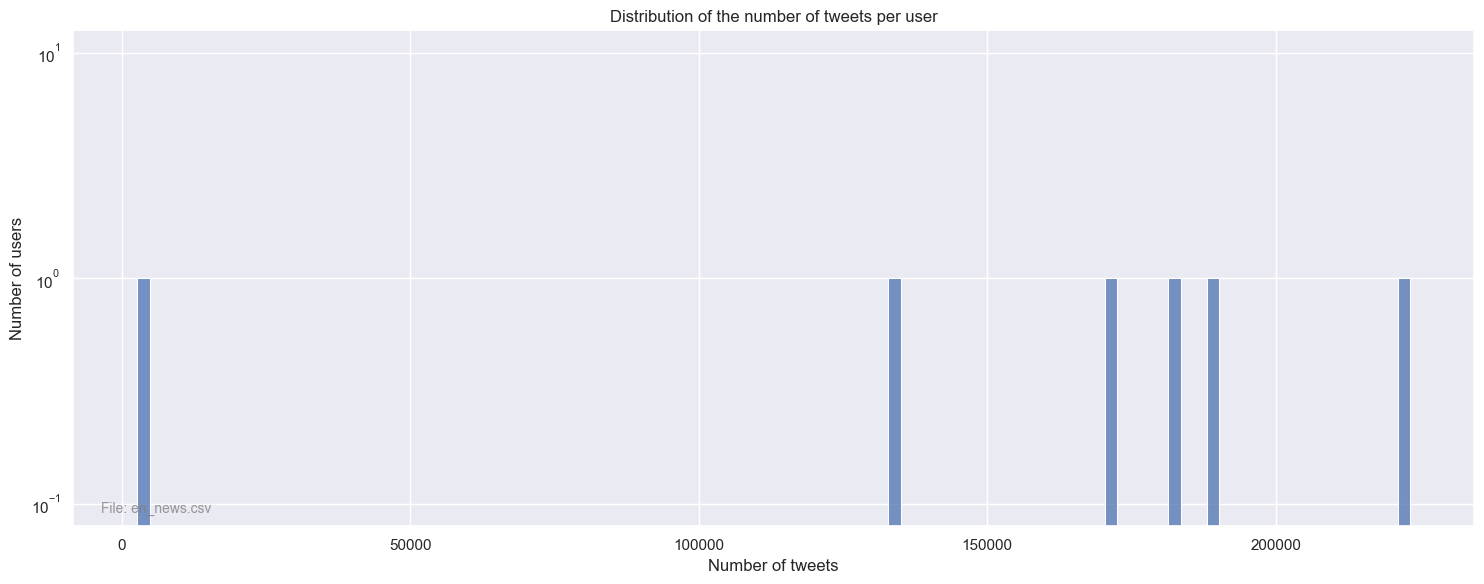

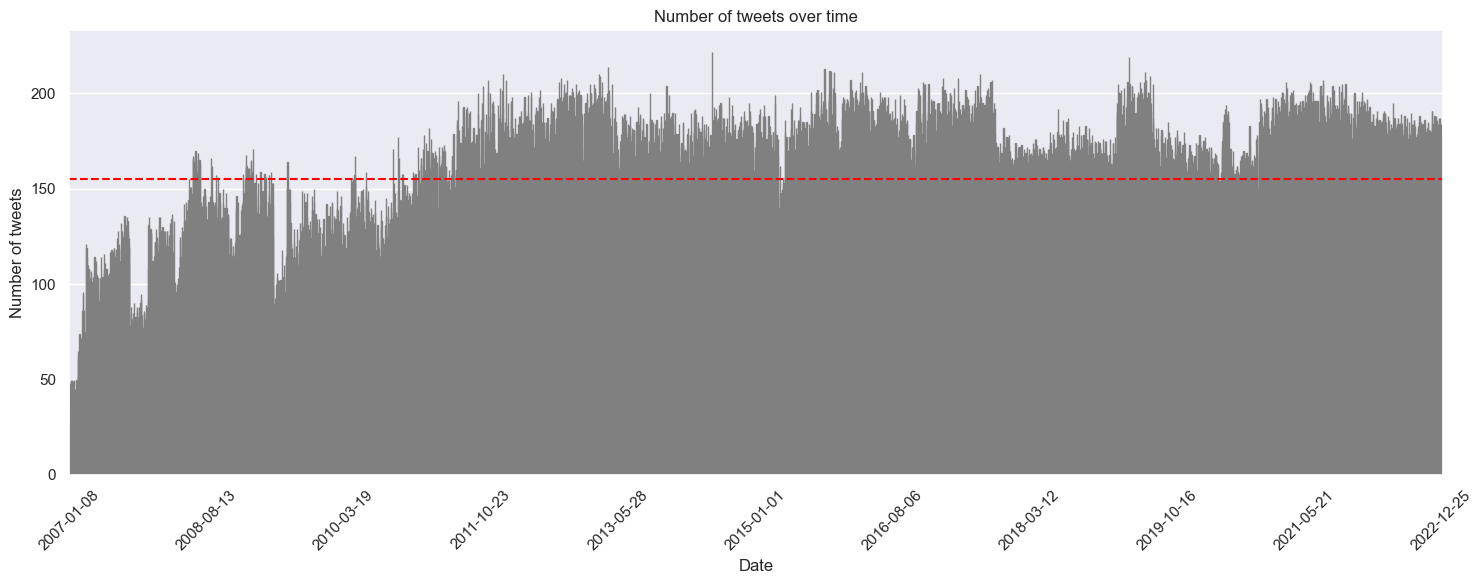

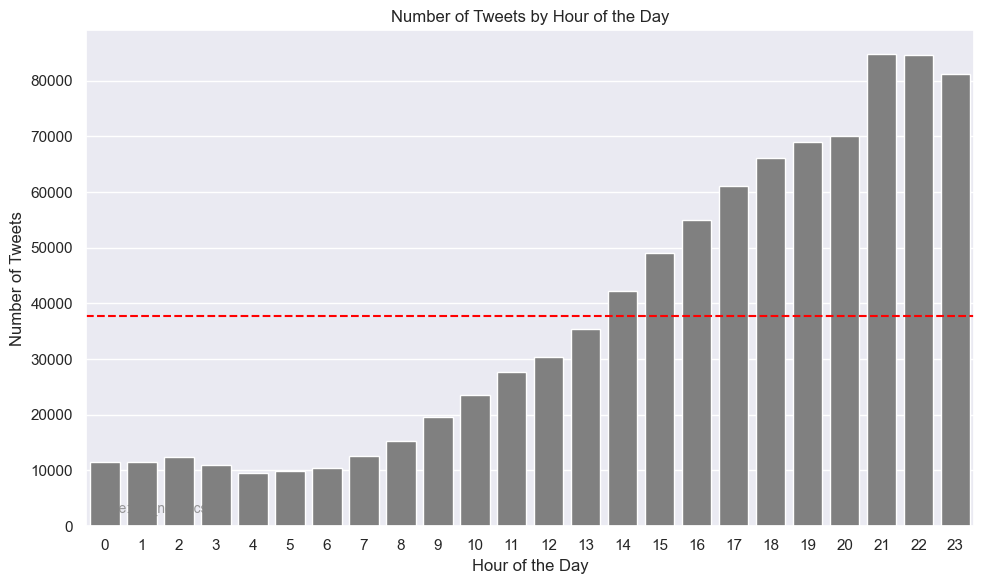

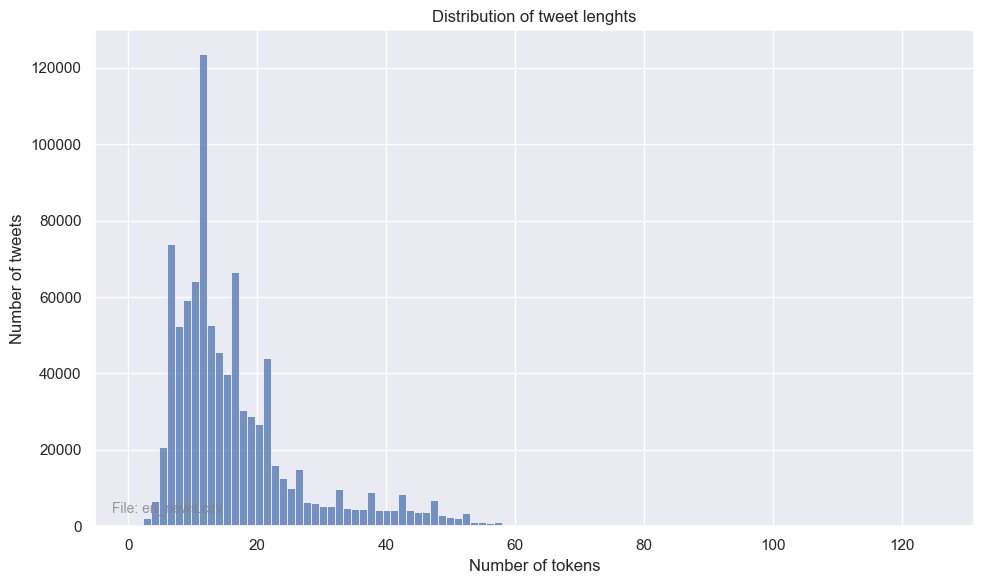

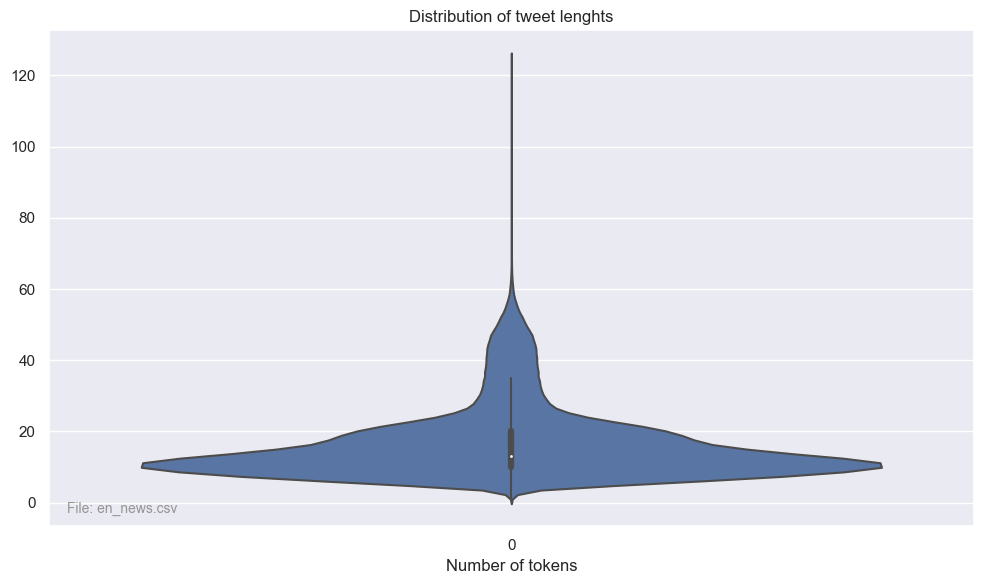

Mean number of tokens per tweet: 16.541846259998806
Median number of tokens per tweet: 13.0
Std number of tokens per tweet: 10.3277557273777
Q1 number of tokens per tweet: 10.0
Q3 number of tokens per tweet: 20.0
Min number of tokens per tweet: 1
Max number of tokens per tweet: 125


[nltk_data] Downloading package stopwords to /Users/admin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Total number of tokens: 14568184
Vocabulary size: 170470
Number of tokens that only appear:
	1: 75227, 44.13%
	<=2: 97011, 56.91%
	<=3: 108490, 63.64%
	<=4: 115685, 67.86%
	<=5: 120838, 70.89%
	<=10: 134504, 78.90%
	<=100: 160208, 93.98%


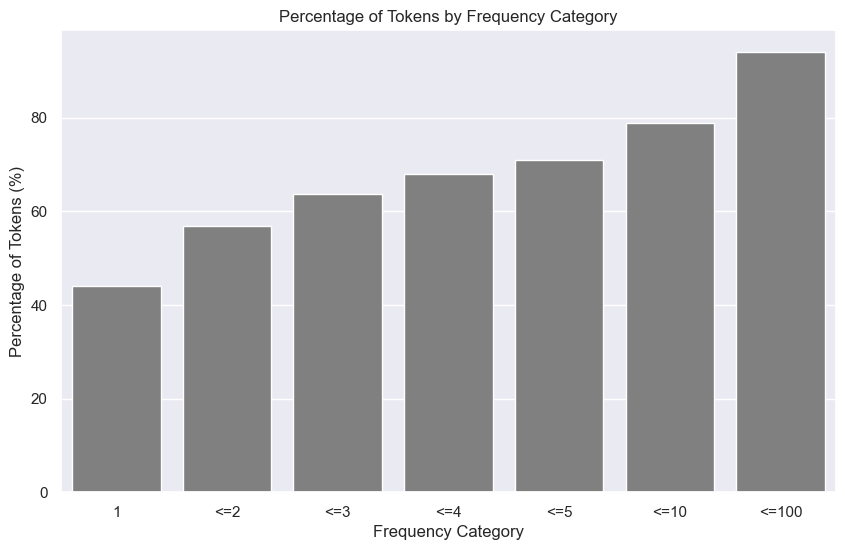

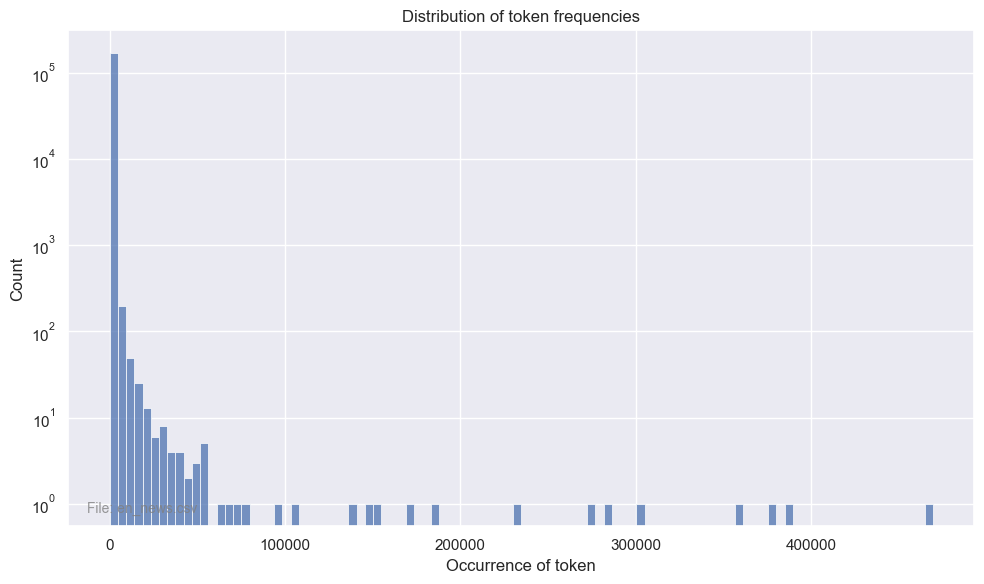

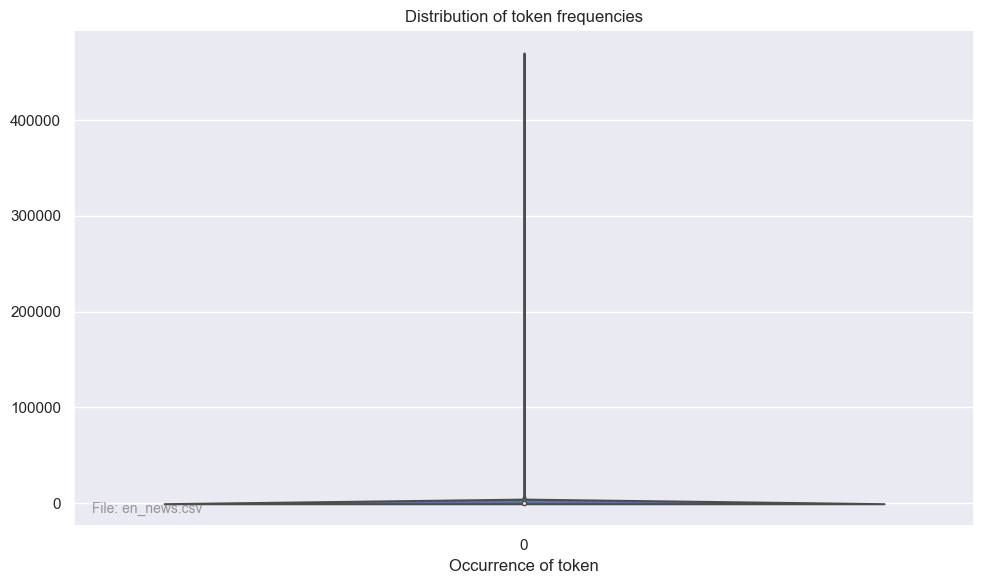


Most common tokens:
     token   count
245    the  469616
8        .  389478
48       ,  377961
51      to  359152
13      in  304504
29      of  285437
49       a  276191
76       :  230636
4328     "  183224
22     and  171206


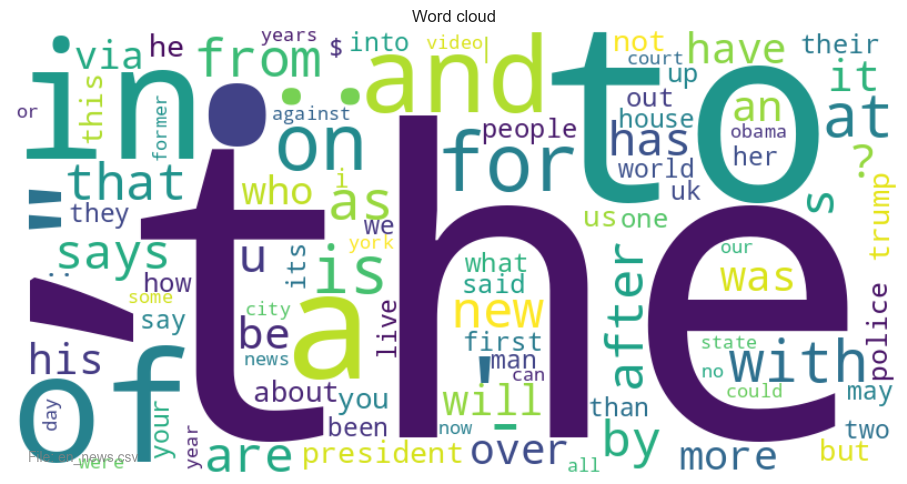


Most common tokens without punctuation:
    token   count
245   the  469616
51     to  359152
13     in  304504
29     of  285437
49      a  276191
22    and  171206
4     for  149072
160    on  139961
189    is   96231
91     at   79041


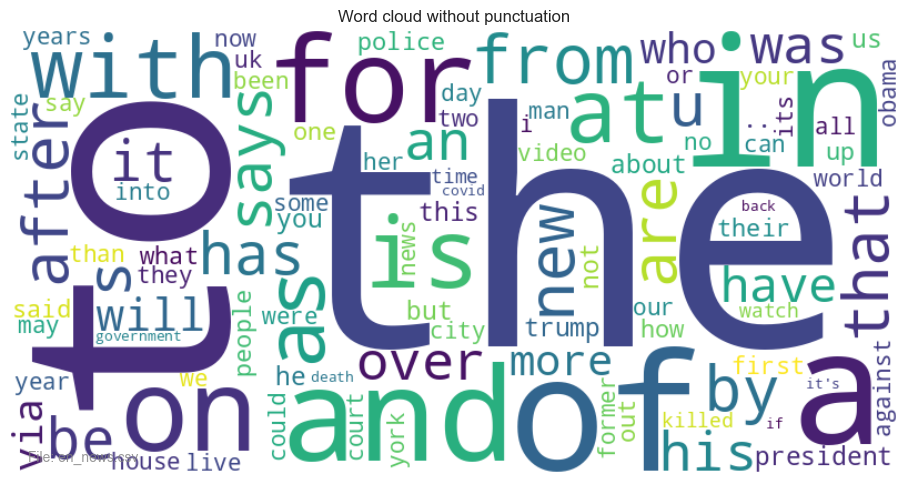


Most common tokens without stopwords:
           token  count
420    president  29057
2724       trump  28471
464       police  24553
22159         ..  21501
5961        live  19231
28050         uk  17559
1936       world  16864
178        house  16097
5           news  15258
877        video  15046


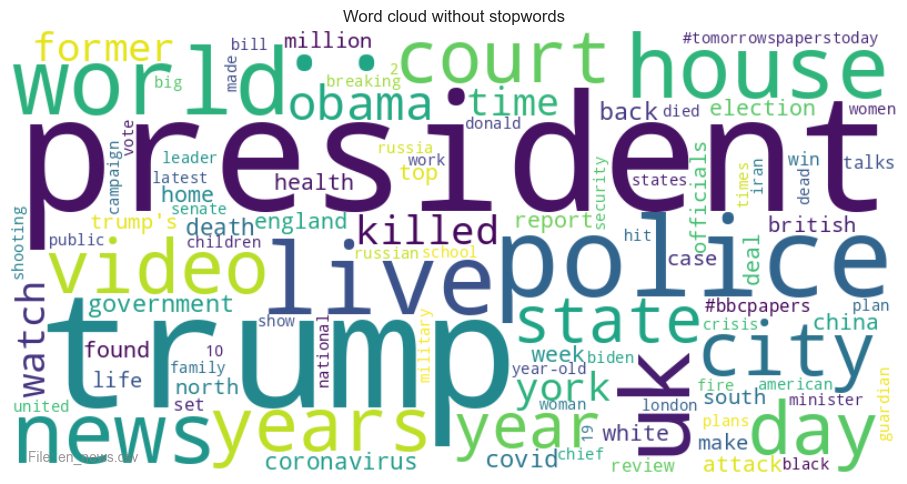

In [15]:
run_tweet_analysis(
    file= "../../data/en_news/en_news.csv",
    save=True)

## Run Analysis on Code
Args:
- file: path to the csv file (String)
- save: whether to save the generated plots (Boolean)

In [ ]:
run_code_analysis(
    file= "/Volumes/shared/Noisy_Entropy_Estimation/data/code/Java/clean_w_ALL/Java_clean_w_ALL.csv",
    save=True)

## Run Analysis on Text
Args:
- file: path to the csv file (String)
- save: whether to save the generated plots (Boolean)

In [ ]:
run_text_analysis(
    file = "../../data/books/alice29.txt",
    save=True)

## Run Analysis on Covid-19 Tweets

In [5]:
import subprocess
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='darkgrid')

dates = []
lines_count = []
languages = []

directory_path = '../../data/covid-cleaned'

In [3]:
for subdir_name in os.listdir(directory_path):
    subdir_path = os.path.join(directory_path, subdir_name)
    
    if os.path.isdir(subdir_path) and "_by_" in subdir_name:
        language = subdir_name.split('_by_')[-1]

        for filename in os.listdir(subdir_path):
            if filename.endswith('.csv'):
                file_path = os.path.join(subdir_path, filename)
                
                # Use the subprocess module to run the wc -l command and get the number of lines
                result = subprocess.run(['wc', '-l', file_path], stdout=subprocess.PIPE)
                num_lines = int(result.stdout.split()[0])
                
                date = filename[:-4]
                
                dates.append(date)
                lines_count.append(num_lines)
                languages.append(language)

In [4]:
df = pd.DataFrame({
    'Date': dates,
    'Number_of_Tweets': lines_count,
    'Language': languages
})
df.sort_values(by='Date', inplace=True)

### Number of Tweets Over Time

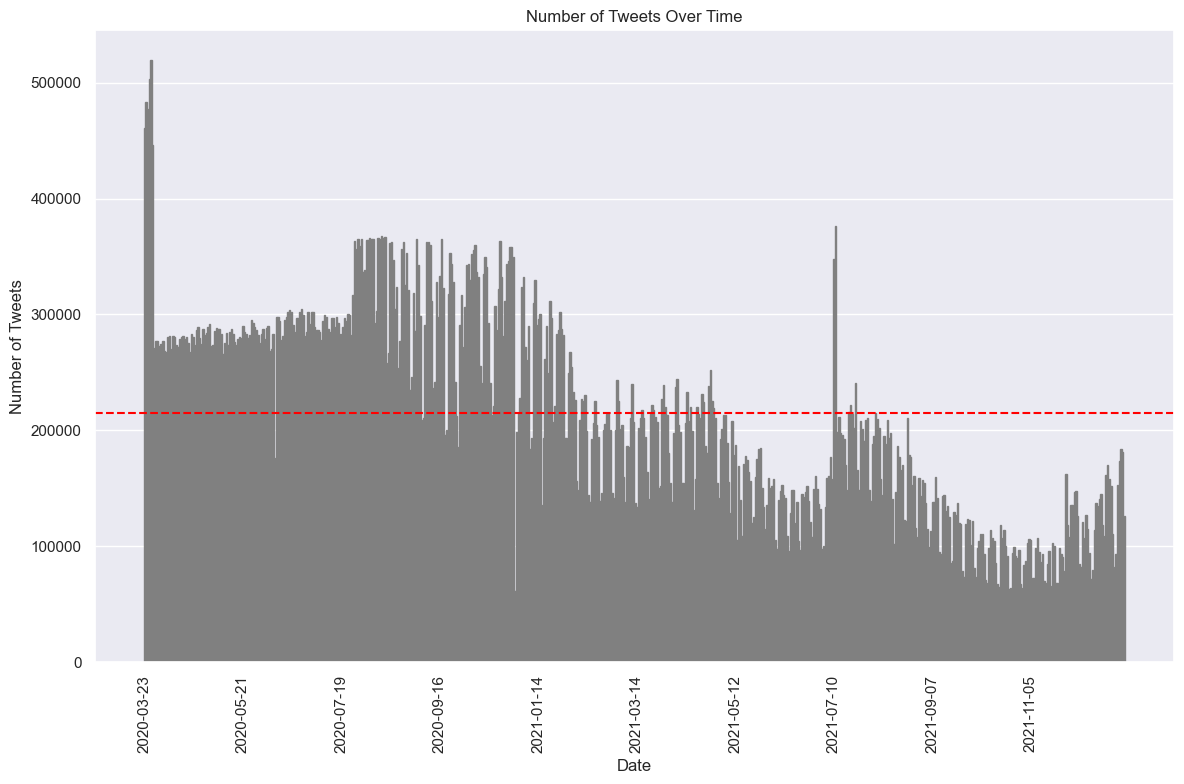

In [18]:
plt.figure(figsize=(12, 8))
df_ = df.groupby('Date')['Number_of_Tweets'].sum().reset_index()
sns.barplot(data=df_, x='Date', y='Number_of_Tweets', color='gray', edgecolor='gray')
plt.axhline(df_['Number_of_Tweets'].mean(), color='red', linestyle='--')
plt.title('Number of Tweets Over Time')
plt.ylabel('Number of Tweets')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.locator_params(axis='x', nbins=10)
plt.tight_layout()
plt.show()

### Number of Tweets by Language

In [19]:
# get all statitics form df_

,Number_of_Tweets
count,588.000000
mean,215110.602041
std,88112.480443
min,61677.000000
25%,141073.500000
50%,209336.000000
75%,286253.500000
max,519194.000000


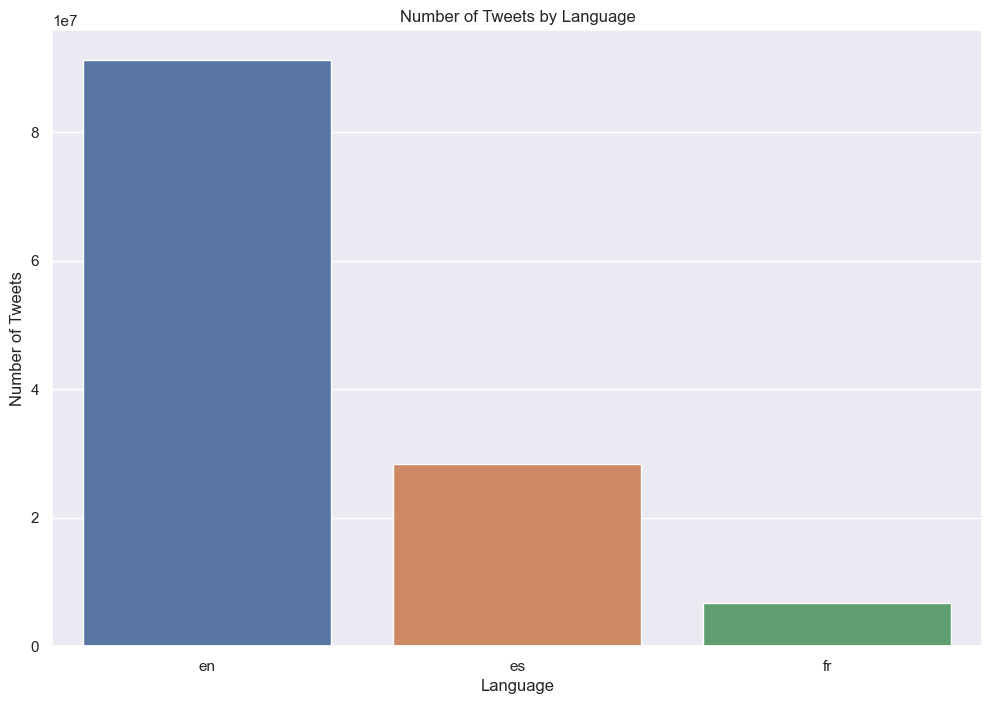

  Language  Number_of_Tweets
0       en          91318297
1       es          28357319
2       fr           6809418


In [17]:
plt.figure(figsize=(12, 8))
df_ = df.groupby('Language')['Number_of_Tweets'].sum().reset_index()
sns.barplot(data=df_, x='Language', y='Number_of_Tweets')
plt.title('Number of Tweets by Language')
plt.ylabel('Number of Tweets')
plt.xlabel('Language')
plt.show()
print(df_)